In [29]:
import torch
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet_uniform import *
from NN_library.ConvNet.ConvNet_uniform import *

In [30]:
torch.__version__

'2.0.1'

### AutoUnet

In [31]:
name = 'NN_library/AutoUnet/AutoUnet_uniform'
args = {'dev' : dev, 'name' : name}
unet = AutoUNet()
unet = load_network(unet, args['name'], args)

In [32]:
data = dataset_uniform()

In [33]:
geometry, damage, imp_shrinkage, _, _ = data.__getitem__(0)
n = 0

# An example input you would normally provide to your model's forward() method.
example = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, damage[[n],:,:]], axis=1).view(1,3,99,99)
torch.save(example, 'input_AutoUnet.pt')

In [6]:
# Use torch.jit.trace to generate a torch.jit.ScriptModule via tracing.
traced_script_module = torch.jit.trace(unet, example)

In [7]:
output = traced_script_module(example)

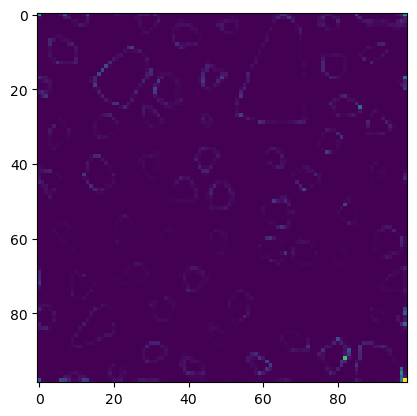

In [11]:
plt.imshow(output[0, 0].detach())

In [16]:
output[0, 0]

tensor([[1.5793e-02, 4.6346e-04, 3.0731e-05,  ..., 9.7201e-04, 2.2801e-03,
         1.3647e-02],
        [8.1215e-04, 1.7615e-05, 6.7374e-07,  ..., 4.4745e-05, 6.7776e-04,
         2.1572e-03],
        [1.7146e-04, 6.8655e-06, 3.0852e-08,  ..., 1.3351e-03, 3.1130e-03,
         1.7343e-03],
        ...,
        [4.5574e-05, 1.9512e-06, 1.0805e-07,  ..., 6.3942e-05, 1.2558e-02,
         9.5443e-04],
        [2.1869e-04, 7.8713e-06, 3.7413e-07,  ..., 9.2054e-05, 8.3006e-03,
         2.0325e-03],
        [6.7982e-03, 2.2956e-04, 5.0567e-05,  ..., 4.0275e-04, 9.8675e-03,
         2.5927e-02]], grad_fn=<SelectBackward0>)

In [12]:
traced_script_module.save("AutoUnet_uniform.pt")

### Save values

In [38]:
class Container(torch.nn.Module):
    def __init__(self, my_values):
        super().__init__()
        for key in my_values:
            setattr(self, key, my_values[key])

input = {
    '0': example
}

input_shrinkage = {
    'imp_shrinkage': (imp_shrinkage[1:] / -0.001).view(-1,1,99,99)
}

# Save arbitrary values supported by TorchScript
# https://pytorch.org/docs/master/jit.html#supported-type
container = torch.jit.script(Container(input))
container.save("container_input_uniform.pt")
container.save("imposed_shrinkage_uniform.pt")

### Convnet

In [19]:
name = 'NN_library/ConvNet/ConvNet_uniform'
args = {'dev' : dev, 'name' : name}
net = ConvNet(16)
net = load_network(net, args['name'], args)

In [27]:
geometry, damage, imp_shrinkage, _, _ = data.__getitem__(0)
n = 1
example = torch.cat([geometry, imp_shrinkage[[n]] / -0.001, damage[[n],:,:]], axis=1).view(1,3,99,99)
torch.save(example, 'input_ConvNet.pt')

In [28]:
traced_script_module = torch.jit.trace(net, example)
traced_script_module.save("ConvNet_uniform.pt")

In [26]:
output = traced_script_module(example)
output

tensor([[1.0000, 0.0808]], grad_fn=<SigmoidBackward0>)